<a href="https://colab.research.google.com/github/InduwaraGayashan001/OpenCV/blob/main/Object_Tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
# Import modules

# import urllib

import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import HTML
from matplotlib.animation import FuncAnimation

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [34]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/ld535c8e0vueq6x/opencv_bootcamp_assets_NB11.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB11.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

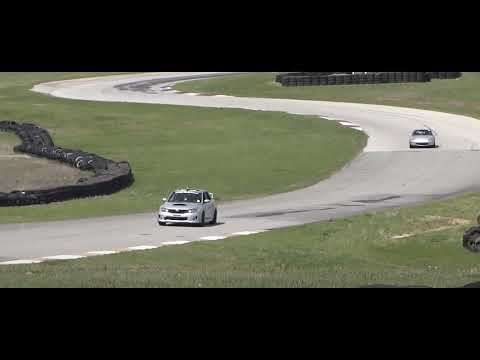

In [35]:
video = YouTubeVideo("XkJCvtCRdVM", width=1024, height=640)
display(video)

# Setup

In [36]:
video_input_file_name = "race_car.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frame, bbox)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.axis('off')

def drawText(frame, text, location, color=(50,170,50)):
    cv2.putText(frame, text, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)


# Create Tracker Instance

In [58]:
# Set up tracker
tracker_types = [
    "BOOSTING",
    "MIL",
    "KCF",
    "CSRT",
    "TLD",
    "MEDIANFLOW",
    "GOTURN",
    "MOSSE",
]

tracker_type = tracker_types[6]

if tracker_type == "BOOSTING":
    tracker = cv2.legacy.TrackerBoosting.create()
elif tracker_type == "MIL":
    tracker = cv2.legacy.TrackerMIL.create()
elif tracker_type == "KCF":
    tracker = cv2.TrackerKCF.create()
elif tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT.create()
elif tracker_type == "TLD":
    tracker = cv2.legacy.TrackerTLD.create()
elif tracker_type == "MEDIANFLOW":
    tracker = cv2.legacy.TrackerMedianFlow.create()
elif tracker_type == "GOTURN":
    tracker = cv2.TrackerGOTURN.create()
elif tracker_type == "MOSSE":
    tracker = cv2.legacy.TrackerMOSSE.create()
else:
    tracker = None
    print("Incorrect tracker name")

# Read Input Video and Setup Output Video

In [59]:
video = cv2.VideoCapture(video_input_file_name)
ok, frame = video.read()

if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
  width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_output_file_name = f"race_car-{tracker_type}.mp4"
video_out = cv2.VideoWriter(video_output_file_name, cv2.VideoWriter_fourcc(*"XVID"), 10, (width, height))


# Define Bounding Box

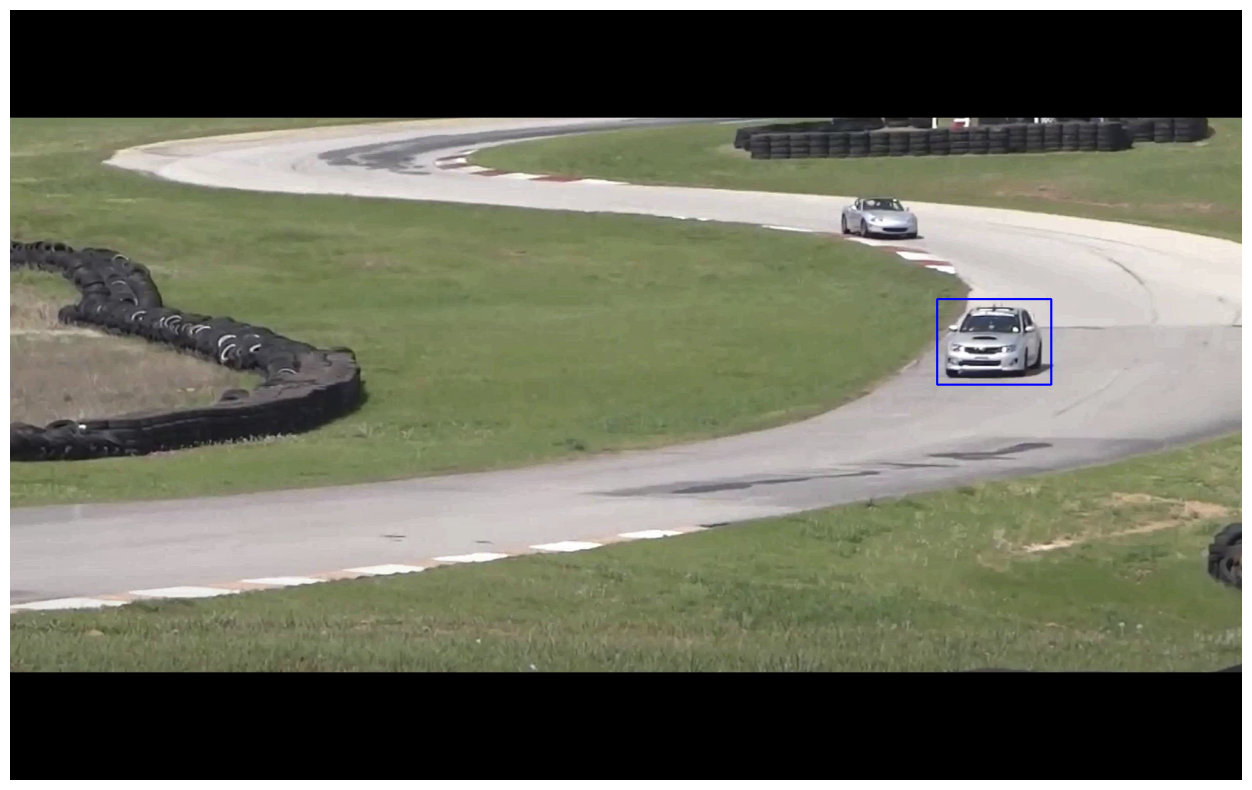

In [61]:
# Define a bounding box
bbox = (1300, 405, 160, 120)
# bbox = cv2.selectROI(frame, False)
# print(bbox)
displayRectangle(frame, bbox)

# Intialize tracker

In [62]:
ok = tracker.init(frame, bbox)

# Read Frame and Track Objet

In [63]:
while True:
    ok, frame = video.read()
    if not ok:
        break

    timer = cv2.getTickCount()
    ok, bbox = tracker.update(frame)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))

    video_out.write(frame)

video.release()
video_out.release()


In [64]:
# Installing ffmpeg
!apt-get -qq install ffmpeg

# Change video encoding of mp4 file from XVID to h264
!ffmpeg -y -i {video_output_file_name} -c:v libx264 $"race_car_track3_x264.mp4"  -hide_banner -loglevel error


In [65]:
# GOTURN - most accurate
mp4 = open("/content/race_car_track3_x264.mp4", "rb").read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""<video width=1024 controls><source src="{data_url}" type="video/mp4"></video>""")